# Numerical solution of initial value problems


Consider the differential equation
\begin{align*}
\frac{dy}{dt}
&= 1 - y
\end{align*}
with the initial condition $y(0)=1$.d
This is easily solve
\begin{align*}
\frac{dy}{1-y} &= -dt
\\
- \ln|1-y(t)| &= -t + C
\end{align*}
Using the initial condition, we find
\begin{align*}
y(t) &= 1 - e^{-t}
.
\end{align*}


If we approximate the
\begin{align*}
\frac{y(t+\Delta t)-y(t)}{\Delta t}
&\approx 1 - y(t)
\\
y(t+\Delta t)
&\approx 
y(t)
+
[1 - y(t)] \Delta t
\end{align*}
This gives us

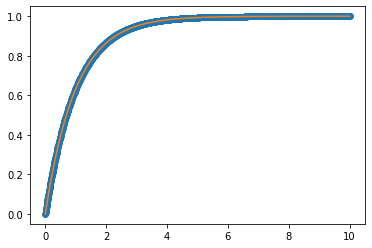

In [ ]:
def f(y, t):
  return 1-y

t_old = 0.0
y_old = 0.0

dt = 1.0e-2
t_list = [t_old]
y_list = [y_old]
for step in range(1000):
  t_new = t_old + dt
  y_new = y_old + f(y_old, t_old) * dt
  t_list.append(t_new)
  y_list.append(y_new)
  t_old = t_new
  y_old = y_new


import numpy as np
import pylab as plt

plt.plot(t_list, y_list, 'o')
plt.plot(t_list, [1-np.exp(-t) for t in t_list])
plt.show()

This method can be generalized to any first order differential equation of the form:
\begin{align*}
\frac{dy}{dt}
&= f(y, t)
,
\end{align*}
with an initial condition $y(0)=y_0$.  

Using the forward difference approximate for the derivative, we find
\begin{align*}
\frac{y(t+\Delta t)-y(t)}{\Delta t} 
&\approx f(y(t), t)
\\
y(t+\Delta t)
&\approx 
y(t)
+ f(y(t),t) \Delta t
.
\end{align*}
This manner of numerically solving a differential equation is known as Euler's method.

## Filling a tank with air

We consider a tank with a fixed volume $V=1\,{\rm m}^3$ that is being filled with air.  Air is at pressure $p_{\rm in}=10\,{\rm bar}$ flows into the tank at a molar flowrate given by
\begin{align*}
\dot{N}_{\rm in}
&= K_{\rm in} \sqrt{\Delta p}
\end{align*}
where $\Delta p=p_{\rm in}-p$ is the pressure drop across the valve, $p$ is the pressure of the air in the tank, and $K_{\rm in}=0.1\,{\rm mol\,min^{-1}\,bar^{-1/2}}$ is a valve coefficient.  The molar flowrate of air out of the tank is given by
\begin{align*}
\dot{N}_{\rm out}
&= K_{\rm out} \sqrt{\Delta p}
\end{align*}
where $\Delta p=p-p_{\rm out}$ is the pressure drop across the valve, $p_{\rm out}=1\,{\rm bar}$ is the downstream pressure, and $K_{\rm out}=0.1\,{\rm mol\,min^{-1}\,bar^{-1/2}}$ is a valve coefficient.  The temperature of the air throughout the system is assumed to remain at $T=300\,{\rm K}$.

Performing a balance on the moles of air in the tank during the period of time from $t$ to $t+\Delta t$, we find
\begin{align*}
N(t+\Delta t) - N(t)
\approx 
\dot{N}_{\rm in} \Delta t - \dot{N}_{\rm out} \Delta t
\end{align*}
We can use Euler's method to solve this differential equation.

In [ ]:

from scipy.optimize import fsolve
import numpy as np

V = 1.0
R = 8.314e-5 # bar m^3 mol^{-1} K^{-1}
T = 300.0
pin = 10.0  # bar
pout = 1.0
Kin = 0.1
Kout = 0.1



def acc(N):
  p = N*R*T/V
  Ndot_in = Kin*np.sqrt(pin-p)
  Ndot_out = Kout*np.sqrt(p-pout)
  return Ndot_in - Ndot_out

pguess = 0.5*(pin+pout)
Nguess = pguess*V/(R*T)
N_steadystate = fsolve(acc, Nguess)
print(N_steadystate)  







[220.51158688]


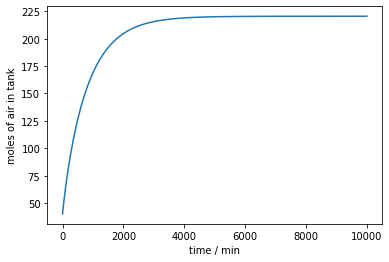

In [ ]:
from scipy.optimize import fsolve
import numpy as np

V = 1.0
R = 8.314e-5 # bar m^3 mol^{-1} K^{-1}
T = 300.0
pin = 10.0  # bar
pout = 1.0
Kin = 0.1
Kout = 0.1



def acc(N):
  p = N*R*T/V
  Ndot_in = Kin*np.sqrt(abs(pin-p))
  Ndot_out = Kout*np.sqrt(abs(p-pout))
  return Ndot_in - Ndot_out


dt = 1.0e0

t_old = 0.0
N_old = pout*V/(R*T)

t_list = [0.0]
N_list = [N_old]
for step in range(10000):
  t_new = t_old + dt
  N_new = N_old + acc(N_old)*dt
  N_list.append(N_new)
  t_list.append(t_new)
  t_old = t_new
  N_old = N_new


import pylab as plt

plt.plot(t_list, N_list)
plt.xlabel('time / min')
plt.ylabel('moles of air in tank')
plt.show()


## Energy balance example

We can also use Euler's method to solve the differential equations that come from an energy balance.

### Background data and code

In [ ]:
R = 8.314e-3  # ideal gas constant / kJ mol^{-1} K^{-1}
T0 = 298.15   # reference temperature / K
p0 = 1.0e5    # reference pressure / Pa


# Data about the gases: 
#  Mw - molecular weight g/mol
#  Hf - heat of formation kJ/mol
#  Gf - Gibbs free energy kJ/mol
data = {}
data['CO']  = {'Mw':28.01 , 'Hf':-110.5 , 'Gf':-137.2 }
data['CO2'] = {'Mw':44.01 , 'Hf':-393.3 , 'Gf':-394.6 }
data['H2']  = {'Mw': 2.02 , 'Hf':   0.0 , 'Gf':   0.0 }
data['H2O'] = {'Mw':18.02 , 'Hf':-241.8 , 'Gf':-228.4 }
data['CH4'] = {'Mw':16.043, 'Hf': -74.52, 'Gf': -50.45}
data['O2']  = {'Mw':31.999, 'Hf':   0.0 , 'Gf':   0.00}
data['N2']  = {'Mw':28.014, 'Hf':   0.0 , 'Gf':   0.00}


data['CO'] ['Cp_coeff'] = [3.912, -3.913e-3,  1.182e-5, -1.302e-8,  0.515e-11]      
data['CO2']['Cp_coeff'] = [3.259,  1.356e-3,  1.502e-5, -2.374e-8,  1.056e-11]      
data['H2'] ['Cp_coeff'] = [2.883,  3.681e-3, -0.772e-5,  0.692e-8, -0.213e-11]      
data['H2O']['Cp_coeff'] = [4.395, -4.186e-3,  1.405e-5, -1.564e-8,  0.632e-11]
data['CH4']['Cp_coeff'] = [4.568, -8.975e-3,  3.631e-5, -3.407e-8,  1.091e-11]
data['O2'] ['Cp_coeff'] = [3.63 , -1.794e-3,  0.658e-5, -0.601e-8,  0.179e-11]
data['N2'] ['Cp_coeff'] = [3.539, -0.261e-3,  0.007e-5,  0.157e-8, -0.099e-11]


# Stoichiometric coefficients for the combustion of methane
nu = {}
nu['CO']  =  0.0
nu['CO2'] =  1.0
nu['H2']  =  0.0
nu['H2O'] =  2.0
nu['CH4'] = -1.0
nu['O2']  = -2.0
nu['N2']  =  0.0



import numpy as np
import pylab as plt
from scipy.optimize import fsolve

# isobaric heat capacity of pure substances / kJ mol^{-1} K^{-1}
def get_Cp_pure(T, molecule):
  a = data[molecule]['Cp_coeff']
  Cp = 0.0
  for n in range(len(a)):
      Cp += a[n]*T**n
  Cp *= R
  return Cp

# molar enthalpy of pure substances / kJ mol^{-1}
def get_H_pure(T, molecule):
  a = data[molecule]['Cp_coeff']
  H = data[molecule]['Hf']
  for n in range(len(a)):
    H += R*a[n]*(T**(n+1)-T0**(n+1))/(n+1)
  return H


# dot product between two vectors
def dot_product(vec1, vec2):
  prod_vec = [x1*x2 for x1, x2 in zip(vec1, vec2)]
  return sum(prod_vec)


# total heat capacity of a mixture / kJ mol^{-1} K^{-1} multiplied by the units of N_dict
def get_Cp(T, N_dict):
  N_list = [N_dict[molecule] for molecule in data.keys()]
  Cp_list = [get_Cp_pure(T, molecule) for molecule in data.keys()] 
  Cp = dot_product(N_list, H_list)
  return Cp

# total enthalpy of a mixture / kJ mol^{-1} multiplied by the units of N_dict
def get_H(T, N_dict):
  N_list = [N_dict[molecule] for molecule in data.keys()]
  H_list = [get_H_pure(T, molecule) for molecule in data.keys()] 
  H = dot_product(N_list, H_list)
  return H


### Steady state energy balance



In [ ]:
from scipy.optimize import fsolve

Tin = 300.0
Ndot_in = {mol: 0.0 for mol in data.keys()}
Ndot_in['CH4'] = 0.1
Ndot_in['O2'] =  0.21*5.0
Ndot_in['N2'] = 0.79 * 5.0

Ndot_out = Ndot_in


def accumulation(T):
  Hdot_in = get_H(Tin, Ndot_in)
  Qdot = 1.0
  Hdot_out = get_H(T, Ndot_out)
  return Hdot_in + Qdot - Hdot_out


Tguess = 300
Tsolution = fsolve(accumulation, Tguess)
print(Tsolution)
  


[306.68953081]
